In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Datasets MLAI/Wholesale customers data.csv')

In [3]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

**No missing values**

In [5]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [6]:
data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [7]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

**Min Max Scaling**

In [8]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
data=minmax.fit_transform(data)

In [9]:
data=pd.DataFrame(data)

In [10]:
data.columns=['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

**KMeans Clustering**

In [11]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

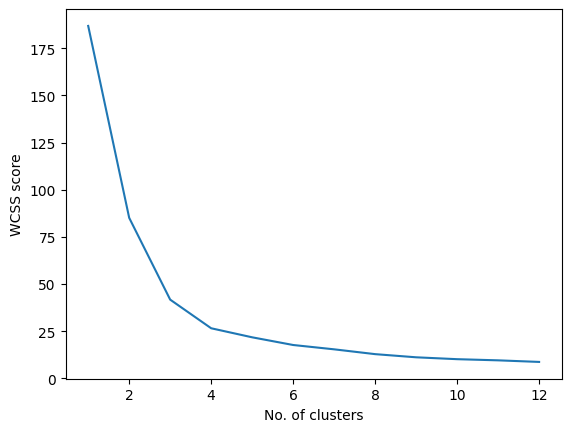

In [13]:
plt.plot(range(1,13),wcss)
plt.xlabel('No. of clusters')
plt.ylabel('WCSS score')
plt.show()

In [14]:
#using elbow method, optimum number of cluster=3

In [15]:
kmeans = KMeans(n_clusters = 3,init='k-means++',random_state=42)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [16]:
y_km = kmeans.predict(data)

In [17]:
y_km

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0,

In [18]:
pd.Series(y_km).value_counts()

2    211
0    142
1     87
dtype: int64

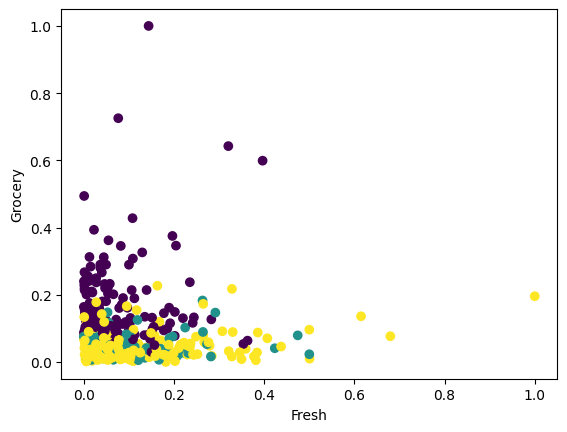

In [19]:
plt.scatter(data['Fresh'],data['Grocery'], c = y_km)
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.show()

In [20]:
from sklearn.metrics import silhouette_score
sil=silhouette_score(data,y_km)
sil

0.6593155081294824

**Agglomerative Hierarchial Clustering**

In [21]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

In [22]:
mergings = linkage(data,method='ward')

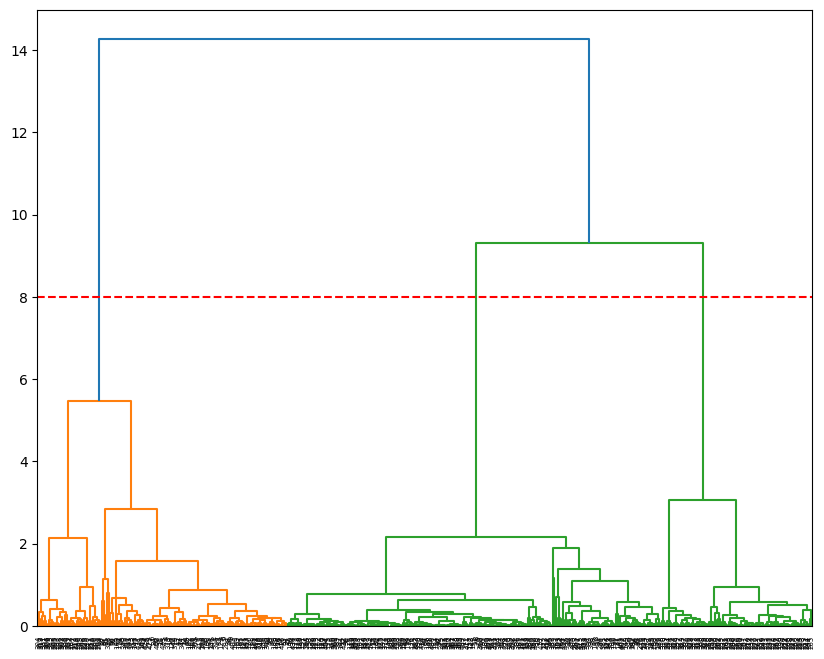

In [23]:
plt.figure(figsize=(10,8))
dendrogram(mergings)
plt.axhline(8,color='red',linestyle = '--')
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
ahc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [26]:
y_ahc

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0,

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
sil_ahc=silhouette_score(data,y_ahc)
sil_ahc

0.6586632301355246

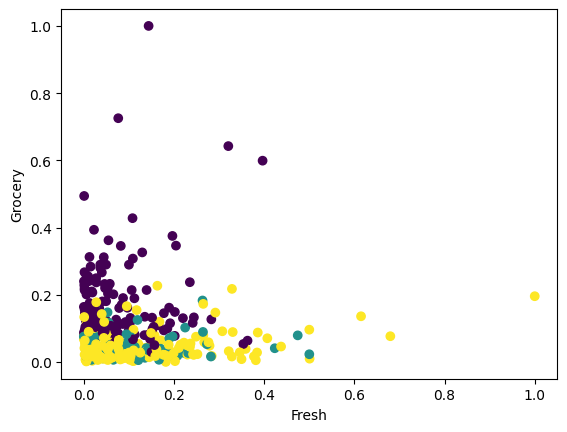

In [29]:
plt.scatter(data['Fresh'],data['Grocery'], c = y_ahc)
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.show()

**Principle Component Analysis**

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca=PCA()

In [32]:
pc_array=pca.fit_transform(data)

In [33]:
pc_array

array([[ 6.86162170e-01, -1.43443370e-01, -1.06267173e-01, ...,
        -5.90245517e-02, -2.41473990e-02,  4.88748336e-04],
       [ 6.92977603e-01, -1.41117414e-01, -1.01794239e-01, ...,
        -3.65684813e-02, -1.68563318e-02,  6.95296563e-03],
       [ 6.90638047e-01, -1.42218567e-01, -9.21403431e-02, ...,
        -5.77268333e-02,  8.82426081e-02, -3.33163229e-02],
       ...,
       [ 7.75945691e-01, -1.25800993e-01,  1.96397068e-01, ...,
         3.99261452e-02,  1.99823301e-02, -7.35024521e-03],
       [-3.03409127e-01, -2.69973816e-01, -4.04321764e-02, ...,
        -2.42172653e-02,  2.56836227e-02, -5.09626131e-03],
       [-2.99436973e-01, -2.67653132e-01, -7.79218893e-02, ...,
        -1.48363042e-02, -3.26917399e-03,  2.27688863e-03]])

In [34]:
pc_array.shape

(440, 8)

In [35]:
pc_array=pd.DataFrame(pc_array,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [36]:
pc_array # after principle component analysis-no dimensionality reduction

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.686162,-0.143443,-0.106267,0.095717,0.003922,-0.059025,-0.024147,0.000489
1,0.692978,-0.141117,-0.101794,0.052838,0.041703,-0.036568,-0.016856,0.006953
2,0.690638,-0.142219,-0.092140,0.072411,0.098295,-0.057727,0.088243,-0.033316
3,-0.304239,-0.270145,-0.001856,0.008736,0.025502,0.044482,0.010826,0.006113
4,0.671296,-0.148007,-0.081052,0.209484,0.023015,-0.017957,0.053042,-0.003418
...,...,...,...,...,...,...,...,...
435,-0.281904,-0.269205,0.220292,0.103926,0.065763,0.034334,-0.048055,0.094415
436,-0.318431,-0.277468,0.071273,0.194493,-0.090485,0.003474,0.014881,-0.024571
437,0.775946,-0.125801,0.196397,-0.093869,-0.083202,0.039926,0.019982,-0.007350
438,-0.303409,-0.269974,-0.040432,-0.028303,-0.009813,-0.024217,0.025684,-0.005096


In [37]:
pc_array.corr().round()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
PC1,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
PC2,0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
PC3,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0
PC4,0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0
PC5,-0.0,-0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0
PC6,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,0.0
PC7,-0.0,0.0,-0.0,0.0,-0.0,0.0,1.0,0.0
PC8,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,1.0


In [38]:
pca.explained_variance_

array([0.23363946, 0.14853705, 0.01863653, 0.01273479, 0.00593106,
       0.00353675, 0.0019785 , 0.00072763])

In [39]:
pca.explained_variance_ratio_*100

array([54.88078792, 34.89064028,  4.37763215,  2.99134061,  1.39317711,
        0.83076482,  0.46474089,  0.17091623])

In [40]:
38.75012291+22.37458795+12.64717345+9.22990372+6.95790497+5.74135444+3.51407568+0.78487688

100.0

In [41]:
pca1=PCA(n_components=5)

In [42]:
pc_array1=pca1.fit_transform(data)

In [43]:
pc_array1.shape

(440, 5)

In [44]:
pc_array1=pd.DataFrame(pc_array1,columns=['PC1','PC2','PC3','PC4','PC5'])

In [45]:
pc_array1 # after principle component analysis-dimensions is reduced to 5

,PC1,PC2,PC3,PC4,PC5
0,0.686162,-0.143443,-0.106267,0.095717,0.003922
1,0.692978,-0.141117,-0.101794,0.052838,0.041703
2,0.690638,-0.142219,-0.092140,0.072411,0.098295
3,-0.304239,-0.270145,-0.001856,0.008736,0.025502
4,0.671296,-0.148007,-0.081052,0.209484,0.023015
...,...,...,...,...,...
435,-0.281904,-0.269205,0.220292,0.103926,0.065763
436,-0.318431,-0.277468,0.071273,0.194493,-0.090485
437,0.775946,-0.125801,0.196397,-0.093869,-0.083202
438,-0.303409,-0.269974,-0.040432,-0.028303,-0.009813


In [46]:
pca1.explained_variance_

array([0.23363946, 0.14853705, 0.01863653, 0.01273479, 0.00593106])

In [47]:
pca1.explained_variance_ratio_*100

array([54.88078792, 34.89064028,  4.37763215,  2.99134061,  1.39317711])

In [48]:
38.75012291+22.37458795+12.64717345+9.22990372+6.95790497

89.959693